# Round 7-2: Network thresholding and spanning trees: the case of US air traffic
In this exercise, we will get familiar with different approaches to thresholding networks, and also learn how they can be used for efficiently visualizing networks.

Now, you are given an undirected network describing the US Air Traffic between 14th and 23rd December 2008 (Data from Bureau of Transportation Statistics).
In the network, each node corresponds to an airport and link weights describe the number of flights between the airports during the time period.

The network is given in the file `aggregated_US_air_traffic_network_undir.edg`, and `us_airport_id_info.csv` contains information about names and locations of the airports. The file `US_air_bg.png` contains a map of the US; you can use the functions provided in the Jupyter notebook template to visualize the network on the map.

This notebook can be used to complete the assignment. It contains a function `plot_network_usa` for visualizing the air transport network. There is no need to modify this function, but do read it through and use it when necessary. You may start your solution after the header "**Begin of the Exercise**" down below. In this exercise, you may also freely use all available `networkx` functions.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [2]:
def plot_network_usa(net, xycoords, bg_figname, edges=None, alpha=0.3):
    """
    Plot the network on top of a map of the US.

    Parameters
    ----------
    net : the network to be plotted
    xycoords : dictionary of node_id to coordinates (x,y)
    bg_figname: file name for the background map figure
    edges : list of node index tuples (node_i,node_j),
            if None all network edges are plotted.
    alpha : float between 0 and 1, describing the level of
            transparency
    """
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 0.9])
    # ([0, 0, 1, 1])
    img = plt.imread(bg_figname)
    axis_extent = (-6674391.856090588, 4922626.076444283,
                   -2028869.260519173, 4658558.416671531)
    ax.imshow(img, extent=axis_extent)
    ax.set_xlim((axis_extent[0], axis_extent[1]))
    ax.set_ylim((axis_extent[2], axis_extent[3]))
    ax.set_axis_off()
    nx.draw_networkx(net,
                     pos=xycoords,
                     with_labels=False,
                     node_color='k',
                     node_size=5,
                     edge_color='r',
                     alpha=alpha,
                     edgelist=edges)
    return fig, ax

## Data
Let us load the data from the right directory. If you run this notebook in your machine, please specify the right directory.

In [3]:
# Select data directory
import os
if os.path.isdir('/coursedata'):
    course_data_dir = '/coursedata'
elif os.path.isdir('../data'):
    course_data_dir = '../data'
else:
    # Specify course_data_dir on your machine
    course_data_dir = 'some_path'

print('The data directory is %s' % course_data_dir)

csv_path = os.path.join(course_data_dir, 'US_airport_id_info.csv')
network_path = os.path.join(course_data_dir, 'aggregated_US_air_traffic_network_undir.edg')
bg_figname = os.path.join(course_data_dir, 'US_air_bg.png')

The data directory is /coursedata


In [4]:
id_data = np.genfromtxt(csv_path, delimiter=',', dtype=None, names=True, encoding='utf8') 
xycoords = {}
for row in id_data:
    xycoords[str(row['id'])] = (row['xcoordviz'], row['ycoordviz'])
net = nx.read_weighted_edgelist(network_path)

# Begin of the exercise

Write your code here to calculate the required metrics, compute the thresholded network, maximal and minimal spanning tree, and visualize the networks. Remember you can use the networkx functions.


### a. Basic properties
Let us first check the basic network properties to get some ideas on what the network is like. Compute the following quantities
- Number of nodes $N$, number of links $L$, and density $D$
- Network diameter $d$
- Average clustering coefficient $C$

**Hints**:
- For the clustering coefficient, consider the undirected and unweighted version of the network, where two airports are linked if there is a flight between them in either direction.

- There is no need to report long decimal values with insignificant digits that the code returns. Adequately leave only the significant figures and drop the others.

In [8]:
#Your solution here
n_nodes = net.number_of_nodes()
print("Number of nodes:", n_nodes)

n_links = net.number_of_edges()
print("Number of links:", n_links)

density = nx.density(net)
print("Density:", density)

diameter = nx.diameter(net)
print("Diameter:", diameter)

avg_clustering_coeff = nx.average_clustering(net)
print("Average clustering coefficient:", avg_clustering_coeff)

Number of nodes: 279
Number of links: 2088
Density: 0.05384079832907867
Diameter: 4
Average clustering coefficient: 0.6465167472774311


### b. Visualization
Visualize the full network with all links on top of the map of the US. The resulting figure is somewhat messy due to the large number of visible links.

**Hint**: Use the above `plot_network_usa` function.

(<Figure size 432x288 with 1 Axes>, <Axes:>)

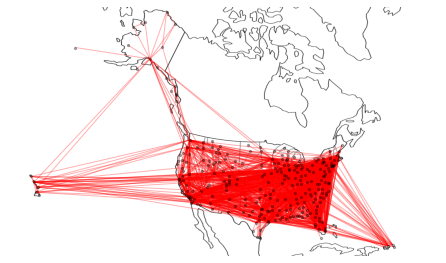

In [9]:
#Your solution here

plot_network_usa(net, xycoords, bg_figname)

### c. Maximal and minimal spanning tree (MST)
In order to reduce the number of plotted links, compute both the maximal and minimal spanning tree (MST) of the network and visualize them. Then, answer following question:
- If you would like to understand the overall organization of the air traffic in the US, would you use the minimal or maximal spanning tree? Why?

**Hint**: For computing minimum spanning trees, use `nx.minimum_spanning_tree`. For computing maximum spanning trees, use `nx.maximum_spanning_tree`.

(<Figure size 432x288 with 1 Axes>, <Axes:>)

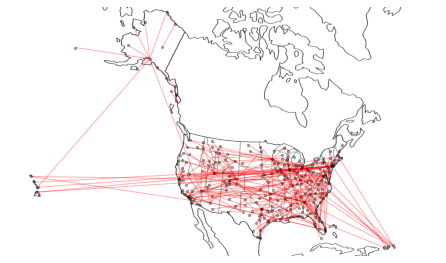

In [11]:
#Your solution here
min_st = nx.minimum_spanning_tree(net)

plot_network_usa(min_st, xycoords, bg_figname)

(<Figure size 432x288 with 1 Axes>, <Axes:>)

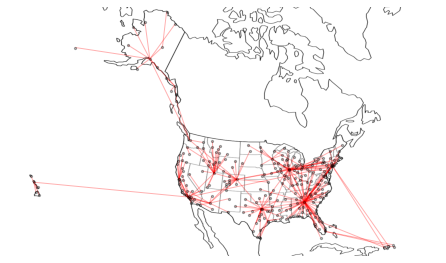

In [12]:
max_st = nx.maximum_spanning_tree(net)

plot_network_usa(max_st, xycoords, bg_figname)

### d. Thresholded networks
Threshold and visualize the network by taking only the strongest $M$ links into account, where $M = N - 1$ is the number of links in the maximal spanning tree. Then, answer following questions:
- How many links does the thresholded network share with the maximal spanning tree?
- Given this number and the visualizations, does simple thresholding yield a similar network as the maximum spanning tree?

**Hint**: Note that the network is undirected, which means that edge $(i, j)$ is the same as edge $(j, i)$.

(<Figure size 432x288 with 1 Axes>, <Axes:>)

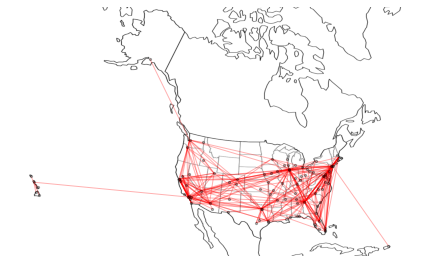

In [20]:
#Your solution here
edges = net.edges(data="weight")

# sort edges based on weight
sorted_edges = sorted(edges, key = lambda x: x[2], reverse=True)

# keep only N-1 strongest edges
strongest_edges = sorted_edges[:(n_nodes - 1)]

# create new network using only those edges
t_net = nx.Graph()
t_net.add_weighted_edges_from(strongest_edges)

# plot
plot_network_usa(t_net, xycoords, bg_figname)

In [25]:
# links in maximal spanning tree
max_tree_links = set(max_st.edges())

# links in thresholded network without weights
t_net_links = {(e[0],e[1]) for e in strongest_edges}

# number of common links between mst and thresholded network
n_common_links = len(max_tree_links.intersection(t_net_links))

print("Number of edges in maximal spanning tree:", n_nodes - 1)
print("Number of common edges:", n_common_links)

Number of edges in maximal spanning tree: 278
Number of common edges: 97
